In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import mysql.connector as connections
from pandas_profiling import ProfileReport


In [39]:
try:
    db_connect = connections.connect(host="localhost",database="classicmodels",username="root",passwd="root",use_pure="Ture")
    que = "select * from products"

    db_read = pd.read_sql(que,db_connect)
    dbdf=pd.DataFrame(db_read)

except Exception as e:
    print(str(e))

f:\Practice space\sample-data-analysis-using-streamlitPython-\env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [40]:
dbdf.head(5)

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


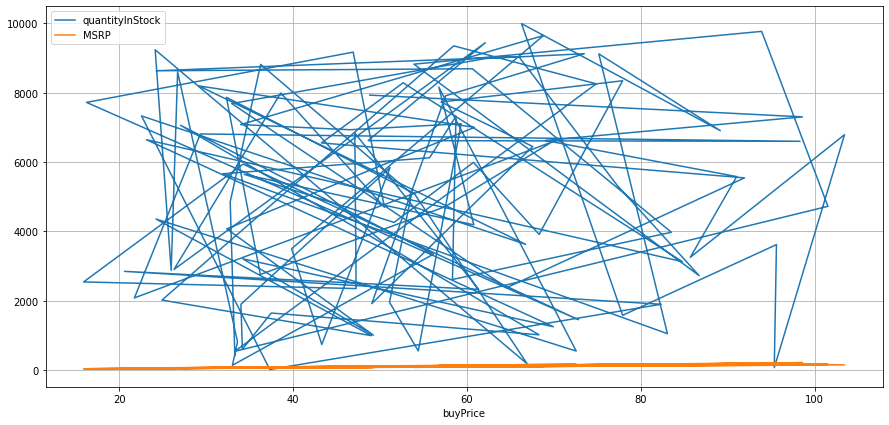

In [41]:
dbdf.set_index('buyPrice').plot(label="buy price",figsize=(15,7))
plt.grid()

In [42]:
report = ProfileReport(dbdf,title="Product description report",explorative=True)
report.to_file("db_analysis.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, max_error
from sklearn.pipeline import Pipeline as PL

In [44]:
dbdf.columns

Index(['productCode', 'productName', 'productLine', 'productScale',
       'productVendor', 'productDescription', 'quantityInStock', 'buyPrice',
       'MSRP'],
      dtype='object')

In [45]:
x = dbdf.drop(['productCode','productName','productLine','productScale','productVendor','productDescription','quantityInStock'],axis=1)
y = dbdf['buyPrice']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1,random_state=30)

In [47]:
pipline_wf = PL([('scaler',StandardScaler()),('pca1',PCA()),('lr_classifier',LinearRegression())])

In [48]:
model = pipline_wf.fit(x_train,y_train)

In [ ]:
y_pred = model.score(x_test)